In [2]:
import pro_gan_pytorch.PRO_GAN as pg
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
gen = torch.nn.DataParallel(pg.Generator(depth=9))

In [8]:
gen.load_state_dict(torch.load("GAN_GEN_SHADOW_8.pth", map_location=str(device)))

In [194]:
noise = torch.randn(1, 512).to(device)
noise_param = torch.nn.Parameter(noise)
# sample_image = torch.nn.functional.interpolate(gen(noise_param, depth=8, alpha=1),scale_factor=1/4)
# target_image = torch.nn.functional.interpolate(gen(noise, depth=8, alpha=1),scale_factor=1/4).detach()
# sample_image = torch.nn.functional.interpolate(gen(noise, depth=8, alpha=1),scale_factor=1/4).detach().cpu().numpy().squeeze()
# sample_image = (np.moveaxis(sample_image,0,-1)+1)/2

In [182]:
loss = torch.mean((sample_image - torch.randn(1,3,256,256).cuda())**2)

In [196]:
opt = torch.optim.Adam(lr=1e-2, params=[noise_param])

In [197]:
for i in range(100):
    sample_image = torch.nn.functional.interpolate(gen(noise_param, depth=8, alpha=1),scale_factor=1/4)
    loss = torch.sum(torch.sum(torch.mean((sample_image - target_image)**2,dim=1),dim=-1),dim=-1).sum()/(256*256*3)
    loss.backward()
    opt.step()
    print(loss.item())

0.06570684164762497
0.05960508808493614
0.054851941764354706
0.05101912468671799
0.048668429255485535
0.04663650318980217
0.04470064491033554
0.04331628605723381
0.042483847588300705
0.04213034734129906
0.04199077934026718
0.04273165017366409
0.04452987015247345
0.046687763184309006
0.04838410019874573
0.049551643431186676
0.05022147297859192
0.05055326223373413
0.05051238462328911
0.05009729787707329
0.04956803843379021
0.048867784440517426
0.04812981188297272
0.04741564393043518
0.04678172618150711
0.04616096615791321
0.045412153005599976
0.044692717492580414
0.044114287942647934
0.04359086602926254
0.04289581626653671
0.04210471361875534
0.04145779833197594
0.04101056233048439
0.04071728140115738
0.04060756787657738
0.04071769863367081
0.041110649704933167
0.04170835763216019
0.04239637777209282
0.04317793995141983
0.04399217292666435
0.044702719897031784
0.04512995108962059
0.04537143558263779
0.04539933055639267
0.04531276971101761
0.04519832134246826
0.045098960399627686
0.045115

In [200]:
sample_image = (sample_image.data.cpu().numpy().squeeze()+1)/2

In [203]:
sample_image = np.moveaxis(sample_image,0,-1)

In [205]:
target_image = (target_image.data.cpu().numpy().squeeze()+1)/2
target_image = np.moveaxis(target_image,0,-1)

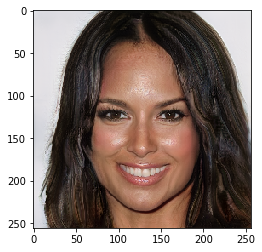

In [206]:
plt.imshow(np.clip(sample_image,0,1))

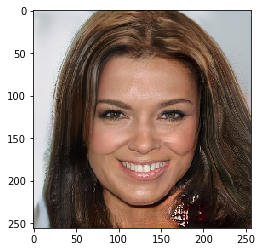

In [207]:
plt.imshow(np.clip(target_image,0,1))